# Imbalanced Datasets and Data Augmentation

In [23]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [24]:
# Generating an imbalanced dataset
from sklearn.datasets import make_classification

X, y = make_classification(n_classes=2, class_sep=2, weights=[0.9, 0.1],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=10, n_clusters_per_class=1, n_samples=1000, random_state=42)

print("Class distribution:", Counter(y))

Class distribution: Counter({0: 900, 1: 100})


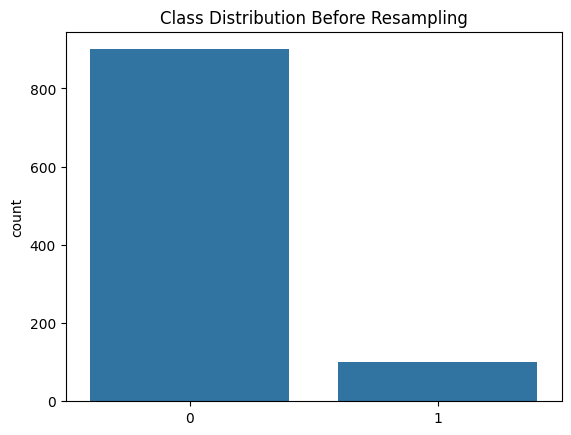

In [25]:
# Plot the class distribution
sns.countplot(x=y)
plt.title("Class Distribution Before Resampling")
plt.show()

## Handling Imbalance: Oversampling with SMOTE


In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution after SMOTE: Counter({0: 900, 1: 900})


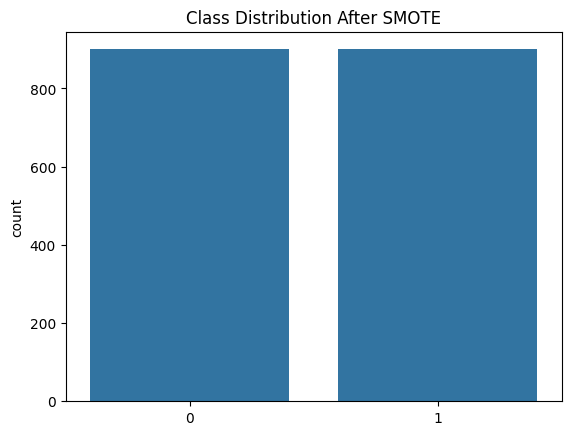

In [27]:
sns.countplot(x=y_resampled)
plt.title("Class Distribution After SMOTE")
plt.show()

## Handling Imbalance: Oversampling with RandomOverSampler


Class distribution after RandomOverSampler: Counter({0: 900, 1: 900})


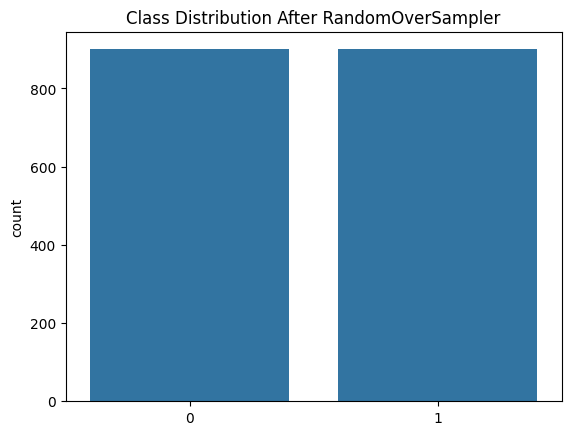

In [28]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled_ros, y_resampled_ros = ros.fit_resample(X, y)

print("Class distribution after RandomOverSampler:", Counter(y_resampled_ros))
sns.countplot(x=y_resampled_ros)
plt.title("Class Distribution After RandomOverSampler")
plt.show()

In [29]:
"""
### Exercise: Apply Different Oversampling Techniques
Try implementing different oversampling techniques such as ADASYN

**Hint:** Use `from imblearn.over_sampling import ADASYN`.
"""

from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
import numpy as np
import collections

# Generate an imbalanced dataset
X, y = make_classification(
    n_classes=3, n_clusters_per_class=1, weights=[0.1, 0.3, 0.6],
    n_samples=1000, n_features=20, random_state=42
)

# Check the class distribution before oversampling
print("Class distribution before ADASYN:", collections.Counter(y))

# Apply ADASYN oversampling
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Check the class distribution after oversampling
print("Class distribution after ADASYN:", collections.Counter(y_resampled))

Class distribution before ADASYN: Counter({2: 597, 1: 301, 0: 102})
Class distribution after ADASYN: Counter({2: 597, 0: 589, 1: 554})


## Handling Imbalance: Undersampling with RandomUnderSampler

In [30]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

print("Class distribution after undersampling:", Counter(y_undersampled))

Class distribution after undersampling: Counter({0: 102, 1: 102, 2: 102})


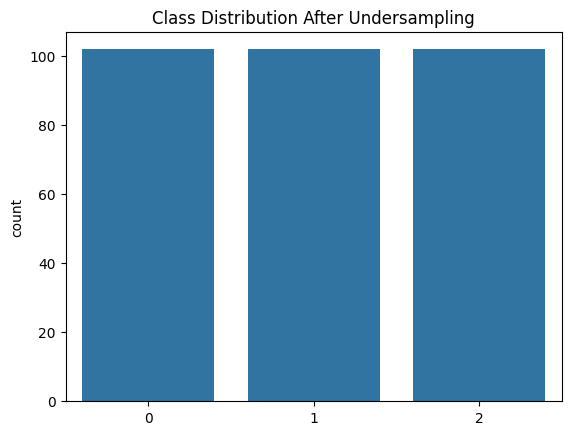

In [31]:
sns.countplot(x=y_undersampled)
plt.title("Class Distribution After Undersampling")
plt.show()

## Handling Imbalance: Undersampling with Cluster Centroids

Class distribution after Cluster Centroids: Counter({0: 102, 1: 102, 2: 102})


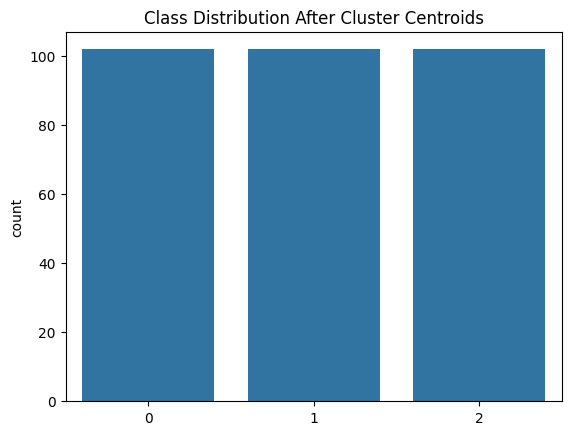

In [32]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=42)
X_cc, y_cc = cc.fit_resample(X, y)

print("Class distribution after Cluster Centroids:", Counter(y_cc))
sns.countplot(x=y_cc)
plt.title("Class Distribution After Cluster Centroids")
plt.show()

In [33]:
"""
### Exercise: Compute Alternative Metrics
Implement functions to compute precision, recall, and F1-score.
Calculate the precision, recall, and F1-score for the imbalanced dataset.
Calculate the precision, recall, and F1-score for each newly balanced dataset.

**Hint:** Use the formulas:
- Precision = TP / (TP + FP)
- Recall = TP / (TP + FN)
- F1-score = 2 * (Precision * Recall) / (Precision + Recall)
"""

from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
import numpy as np
import collections
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Function to compute precision, recall, and F1-score manually
def compute_metrics(y_true, y_pred):
    unique_classes = np.unique(y_true)
    precision_list, recall_list, f1_list = [], [], []

    for cls in unique_classes:
        TP = np.sum((y_true == cls) & (y_pred == cls))
        FP = np.sum((y_true != cls) & (y_pred == cls))
        FN = np.sum((y_true == cls) & (y_pred != cls))

        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

    return np.mean(precision_list), np.mean(recall_list), np.mean(f1_list)

# Generate an imbalanced dataset
X, y = make_classification(
    n_classes=3, n_clusters_per_class=1, weights=[0.1, 0.3, 0.6],
    n_samples=1000, n_features=20, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the class distribution before oversampling
print("Class distribution before ADASYN:", collections.Counter(y_train))

# Apply ADASYN oversampling
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after ADASYN:", collections.Counter(y_train_resampled))

# Train logistic regression models
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)
y_pred_resampled = LogisticRegression().fit(X_train_resampled, y_train_resampled).predict(X_test)

# Compute metrics for the imbalanced dataset
precision_before, recall_before, f1_before = compute_metrics(y_test, y_pred)
print(f"Before ADASYN - Precision: {precision_before:.4f}, Recall: {recall_before:.4f}, F1-score: {f1_before:.4f}")

# Compute metrics for the resampled dataset
precision_after, recall_after, f1_after = compute_metrics(y_test, y_pred_resampled)
print(f"After ADASYN - Precision: {precision_after:.4f}, Recall: {recall_after:.4f}, F1-score: {f1_after:.4f}")


Class distribution before ADASYN: Counter({2: 474, 1: 246, 0: 80})
Class distribution after ADASYN: Counter({2: 474, 0: 463, 1: 451})
Before ADASYN - Precision: 0.8762, Recall: 0.8427, F1-score: 0.8580
After ADASYN - Precision: 0.8464, Recall: 0.8719, F1-score: 0.8561


# Data Augmentation (Adding noise)

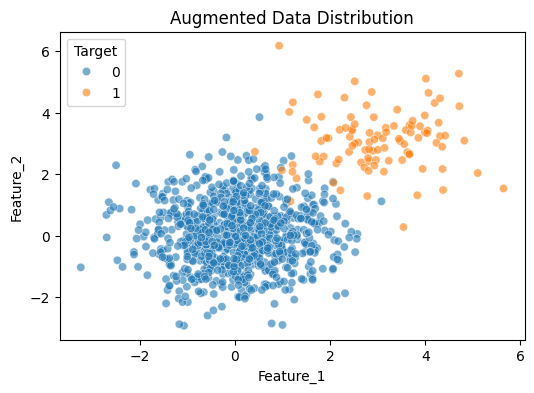

In [34]:
# Data Augmentation Example (Adding noise)
def add_noise(data, noise_level=0.1):
    noise = np.random.normal(scale=noise_level, size=data.shape)
    return data + noise

# Generate an imbalanced dataset
np.random.seed(42)
size = 1000
class_0 = np.random.normal(loc=0, scale=1, size=(int(size * 0.9), 2))  # Majority class
class_1 = np.random.normal(loc=3, scale=1, size=(int(size * 0.1), 2))  # Minority class

data_0 = pd.DataFrame(class_0, columns=['Feature_1', 'Feature_2'])
data_0['Target'] = 0
data_1 = pd.DataFrame(class_1, columns=['Feature_1', 'Feature_2'])
data_1['Target'] = 1
df = pd.concat([data_0, data_1]).sample(frac=1).reset_index(drop=True)

df_augmented = df.copy()
df_augmented.loc[df_augmented['Target'] == 1, ['Feature_1', 'Feature_2']] = add_noise(df_augmented[df_augmented['Target'] == 1][['Feature_1', 'Feature_2']])

# Visualizing augmented data
plt.figure(figsize=(6,4))
sns.scatterplot(x=df_augmented['Feature_1'], y=df_augmented['Feature_2'], hue=df_augmented['Target'], alpha=0.6)
plt.title('Augmented Data Distribution')
plt.show()

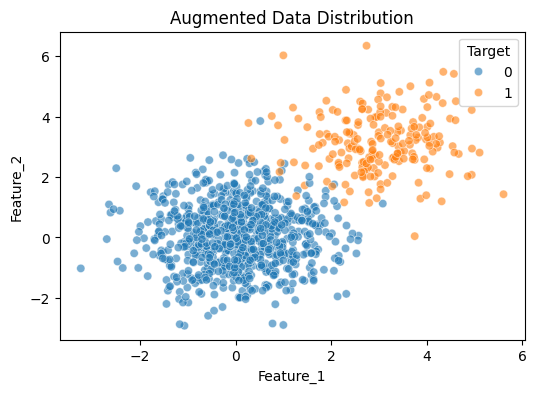

In [35]:
"""
### Exercise: Analyze the Impact of Class Distribution
Manually adjust the proportion of class 1 in the dataset (e.g., increase from 10% to 20%) and observe how it affects data visualization.
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to add noise for data augmentation
def add_noise(data, noise_level=0.1):
    noise = np.random.normal(scale=noise_level, size=data.shape)
    return data + noise

# Generate an imbalanced dataset
np.random.seed(42)
size = 1000
class_0 = np.random.normal(loc=0, scale=1, size=(int(size * 0.8), 2))  # Majority class (80%)
class_1 = np.random.normal(loc=3, scale=1, size=(int(size * 0.2), 2))  # Minority class (20%)

data_0 = pd.DataFrame(class_0, columns=['Feature_1', 'Feature_2'])
data_0['Target'] = 0
data_1 = pd.DataFrame(class_1, columns=['Feature_1', 'Feature_2'])
data_1['Target'] = 1
df = pd.concat([data_0, data_1]).sample(frac=1).reset_index(drop=True)

# Apply data augmentation to minority class
df_augmented = df.copy()
df_augmented.loc[df_augmented['Target'] == 1, ['Feature_1', 'Feature_2']] = add_noise(
    df_augmented[df_augmented['Target'] == 1][['Feature_1', 'Feature_2']]
)

# Visualizing augmented data
plt.figure(figsize=(6,4))
sns.scatterplot(x=df_augmented['Feature_1'], y=df_augmented['Feature_2'], hue=df_augmented['Target'], alpha=0.6)
plt.title('Augmented Data Distribution')
plt.show()